In [53]:
import pandas as pd

In [54]:
file_path="data/selected_variables.csv"

In [55]:
num_rows = sum(1 for _ in open(file_path))
num_rows

490556

In [57]:
df = pd.read_csv(file_path)


/var/folders/rq/nzqjmf0x07vg4p477yrb9w800000gn/T/ipykernel_41548/2775674321.py:1: DtypeWarning: Columns (211,212,213,214,215,217,218,219,220,221,286) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [58]:
df

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,regionru,regionse,regionsi,regionsk,regiontr,regionua,regunit,ccrdprs,ccnthum,wrclmch
0,ESS1e06_7,1,6.7,23.11.2023,1,AT,0.9452,0.940933,0.271487,0.255451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ESS1e06_7,1,6.7,23.11.2023,2,AT,0.4726,0.470466,0.271487,0.127726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ESS1e06_7,1,6.7,23.11.2023,3,AT,0.9452,1.392155,0.271487,0.377953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ESS1e06_7,1,6.7,23.11.2023,4,AT,0.9452,1.382163,0.271487,0.375240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ESS1e06_7,1,6.7,23.11.2023,6,AT,1.8905,1.437766,0.271487,0.390336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490550,ESS10SCe03_1,10,3.1,02.11.2023,57345,SE,1.0000,1.156429,0.373480,0.431903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,2.0
490551,ESS10SCe03_1,10,3.1,02.11.2023,57354,SE,1.0000,0.816802,0.373480,0.305060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0
490552,ESS10SCe03_1,10,3.1,02.11.2023,57356,SE,1.0000,1.606818,0.373480,0.600115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,4.0,4.0
490553,ESS10SCe03_1,10,3.1,02.11.2023,57364,SE,1.0000,1.620679,0.373480,0.605292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,5.0,3.0


In [62]:
def missing_values_statistics(dataset):
    # Calculate the number of missing values for each column
    missing_values_count = dataset.isnull().sum()

    # Calculate the percentage of missing values for each column
    missing_values_percentage = (missing_values_count / len(dataset)) * 100

    # Create a DataFrame to store the statistics
    missing_values_stats = pd.DataFrame({
        'Column': missing_values_count.index,
        'Missing Values': missing_values_count.values,
        'Percentage': missing_values_percentage.values
    })

    # Sort the DataFrame by the number of missing values
    missing_values_stats = missing_values_stats.sort_values(by='Missing Values', ascending=False)

    return missing_values_stats

In [63]:
def plot_missing_values_histogram(missing_stats):
    # Plot a histogram of the distribution of missing values percentages
    plt.figure(figsize=(10, 6))
    plt.hist(missing_stats['Percentage'], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Percentage of Missing Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of Missing Values in Percentages')
    plt.grid(True)
    plt.show()

In [64]:
import re

# Define the regex pattern to match column names
pattern_region = re.compile(r'^regio.*', flags=re.IGNORECASE)

# Use filter() to select columns matching the pattern
region_columns = list(filter(pattern_region.match, df.columns))

# Create a new DataFrame with only the selected columns
region_df = df[region_columns]
region_df.describe()

,regionat,regionbe,regionbg,regioach,regioncy,regioncz,regioacz,regionde,regiondk,regioadk,...,regionpl,regionpt,regioapt,regionro,regionru,regionse,regionsi,regionsk,regiontr,regionua
count,6918.000000,7235.000000,3630.000000,7804.000000,2210.000000,4386.000000,2018.000000,11456.000000,4498.000000,1610.000000,...,7166.000000,5785.000000,2367.000000,2146.000000,4949.000000,7704.000000,5723.000000,5088.000000,4272.000000,5878.000000
mean,5.340272,1.705183,14.365840,3.361097,21.233484,8.496352,4.633300,8.888530,8.259004,2.940373,...,16.684901,2.235091,2.269962,25.807083,4.920792,4.230010,6.575223,10.079009,5.702013,12.312351
std,2.465110,0.921299,8.074777,1.765883,11.889668,30.250676,2.195981,4.234615,4.708427,1.332828,...,8.890860,1.106241,1.080546,10.581598,2.705310,2.609622,3.069462,72.273396,3.752457,7.510126
min,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,7.000000,2.000000,10.000000,3.000000,3.000000,5.000000,3.000000,2.000000,...,10.000000,1.000000,1.000000,21.000000,2.000000,2.000000,4.000000,3.000000,3.000000,5.000000
50%,5.000000,1.000000,16.000000,3.000000,20.000000,8.000000,5.000000,9.000000,9.000000,3.000000,...,14.000000,2.000000,2.000000,22.000000,5.000000,4.000000,7.000000,5.000000,5.000000,12.000000
75%,7.000000,3.000000,22.000000,5.000000,30.000000,11.000000,6.000000,13.000000,13.000000,4.000000,...,24.000000,3.000000,3.000000,32.000000,7.000000,7.000000,9.000000,7.000000,8.000000,18.000000
max,9.000000,3.000000,28.000000,7.000000,51.000000,999.000000,8.000000,16.000000,15.000000,5.000000,...,32.000000,5.000000,5.000000,42.000000,10.000000,8.000000,12.000000,999.000000,12.000000,26.000000


In [65]:
# Define the regex pattern to match column names
pattern_parties = re.compile(r'^prtv.*', flags=re.IGNORECASE)

# Use filter() to select columns matching the pattern
party_votes_columns = list(filter(pattern_parties.match, df.columns))

# Create a ew DataFrame with only the selected columns
parties_df = df[party_votes_columns]
parties_df.describe()

,prtvde1,prtvade1,prtvbde1,prtvcde1,prtvdde1,prtvede1,prtvde2,prtvade2,prtvbde2,prtvcde2,...,prtvtdsk,prtvttr,prtvtatr,prtvtua,prtvtaua,prtvtbua,prtvtcua,prtvtxk,prtvtrs,prtvtme
count,2919.000000,2870.000000,5667.000000,3031.000000,2958.000000,8255.000000,2919.000000,2870.000000,5667.000000,3031.000000,...,1083.000000,1856.000000,2416.000000,2031.000000,2002.000000,3776.000000,2178.000000,1295.000000,2043.000000,1200.000000
mean,23.198698,29.689199,27.867831,28.696800,28.377282,25.322835,23.432682,30.028920,28.246515,28.519960,...,31.149584,30.524784,35.071606,33.074840,17.549451,23.452595,25.063820,37.843243,40.523740,37.683333
std,31.626216,33.881083,33.524519,33.569623,33.711256,32.721191,31.578348,33.771786,33.575133,33.390047,...,32.094445,36.392476,34.374979,33.776625,28.261165,30.459351,31.239779,33.250457,34.946199,32.581478
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,6.000000
50%,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,...,8.000000,5.000000,12.000000,14.000000,3.000000,5.000000,5.000000,66.000000,66.000000,14.000000
75%,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,9.750000,66.000000,66.000000,66.000000,77.000000,77.000000
max,88.000000,88.000000,88.000000,88.000000,99.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,99.000000,88.000000,88.000000,88.000000,99.000000,99.000000,88.000000,88.000000,88.000000


In [66]:
# Use filter() to select columns not matching the patterns
other_variables_col = list(filter(lambda col: not(pattern_parties.match(col) or pattern_region.match(col)), df.columns))

# Create a new DataFrame with only the selected columns
other_variables_df = df[other_variables_col]
other_variables_df.describe()

,essround,edition,idno,dweight,pspwght,pweight,anweight,prob,stratum,psu,...,iplylfr,iprspot,ipshabt,ipstrgv,ipsuces,ipudrst,regunit,ccrdprs,ccnthum,wrclmch
count,490555.000000,490555.000000,4.905550e+05,490555.000000,490555.000000,490555.000000,400018.000000,109204.000000,109204.000000,109204.000000,...,462484.000000,462490.000000,462489.000000,462493.000000,462489.000000,462495.000000,278833.000000,104072.000000,104072.000000,104072.000000
mean,5.631746,3.552326,9.937962e+08,1.000000,1.004424,0.960863,0.952282,0.001257,1385.398566,12191.400123,...,2.098103,3.274289,3.285525,2.477875,3.271455,2.546088,2.446945,9.047707,6.633984,3.288973
std,2.869015,1.177988,1.818970e+10,0.418180,0.555381,1.118180,1.461442,0.002586,973.096918,7128.004376,...,1.321277,1.588870,1.583197,1.539878,1.569754,1.408285,0.818373,15.385446,15.211237,1.143798
min,1.000000,2.300000,1.000000e+00,0.001600,0.000004,0.022428,0.000001,0.000005,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,3.000000,2.600000,1.773000e+03,0.858442,0.680608,0.230129,0.179632,0.000287,358.000000,5996.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,5.000000,3.000000,3.000000
50%,6.000000,3.200000,1.057300e+04,1.000000,0.920021,0.417552,0.404342,0.000543,1530.000000,11922.000000,...,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,6.000000,4.000000,3.000000
75%,8.000000,3.700000,5.146400e+04,1.051200,1.185674,1.857518,1.254741,0.001074,2359.000000,17193.000000,...,2.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,8.000000,4.000000,4.000000
max,10.000000,6.700000,5.101304e+11,6.206992,6.854967,5.447134,21.997766,0.045450,2914.000000,27238.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,4.000000,99.000000,99.000000,9.000000


In [67]:
missing_stats = missing_values_statistics(other_variables_df)
print("Statistics about missing values:")
print(missing_stats)

Statistics about missing values:
     Column  Missing Values  Percentage
47  ctzship          448196   91.365086
41  cntbrth          448196   91.365086
82  hincsrc          448196   91.365086
72   rship4          448196   91.365086
70   rship3          448196   91.365086
..      ...             ...         ...
54  hlthhmp               0    0.000000
53   health               0    0.000000
97  pdjobev               0    0.000000
52    happy               0    0.000000
0      name               0    0.000000

[120 rows x 3 columns]


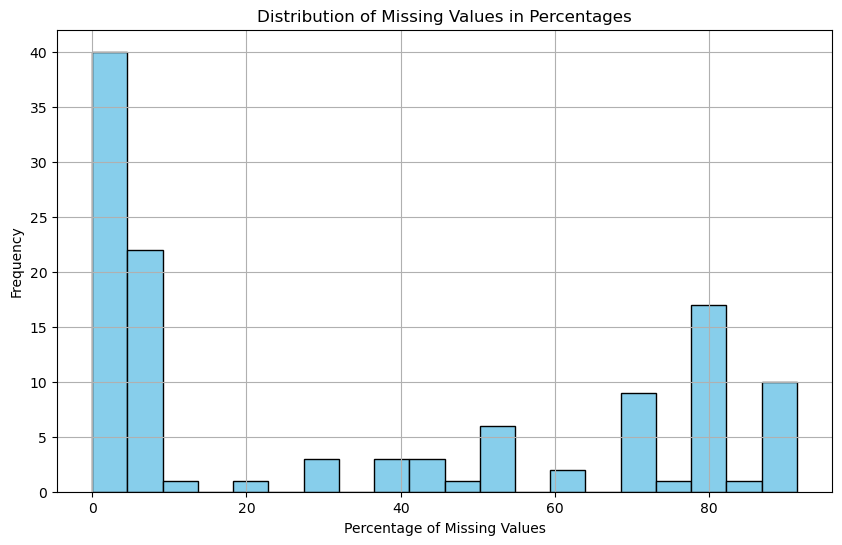

In [68]:
plot_missing_values_histogram(missing_stats)


In [69]:
# Filter the missing_stats DataFrame to get columns with more than 90% missing values
columns_with_more_than_80_percent_missing = missing_stats[missing_stats['Percentage'] > 80]

# Print the columns
print("Columns with more than 80% missing values:")
print(columns_with_more_than_80_percent_missing)

Columns with more than 80% missing values:
      Column  Missing Values  Percentage
47   ctzship          448196   91.365086
41   cntbrth          448196   91.365086
82   hincsrc          448196   91.365086
72    rship4          448196   91.365086
70    rship3          448196   91.365086
68    rship2          448196   91.365086
29   ilglpst          448196   91.365086
25    dntmny          448196   91.365086
76       age          447555   91.234418
51  ctzshipd          441036   89.905515
93   marital          403968   82.349176
86     lvghw          400659   81.674634
88   lvgoptn          400659   81.674634
89    lvgptn          400659   81.674634
48  ctzshipa          400018   81.543966
42  cntbrtha          400018   81.543966
90   lvgptna          394869   80.494338
87    lvghwa          392464   80.004077
94  maritala          392464   80.004077


From this analysis, we see that most of the variables that have more than 80% missing values are not very relevant.

Age is not a problem, as there is "year of birth" variable that has 0% missing values.

In [86]:
# Filter rows for gender values 1 and 2
filtered_df = df[df['gndr'].isin([1, 2])]

# Filter rows for lrscale values from 0 to 10
filtered_df = filtered_df[(filtered_df['lrscale'] >= 0) & (filtered_df['lrscale'] <= 10)]

# Group by gender and lrscale and calculate the counts
grouped_df = filtered_df.groupby(['gndr', 'lrscale']).size().reset_index(name='counts')

# Pivot the DataFrame to have gender as rows and lrscale as columns
pivot_df = grouped_df.pivot(index='gndr', columns='lrscale', values='counts').fillna(0)

# Normalize the counts to get percentages
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Print the resulting pivot table
print("Distribution of lrscale for men and women:")
pivot_df

Distribution of lrscale for men and women:


lrscale,0,1,2,3,4,5,6,7,8,9,10
gndr,,,,,,,,,,,
1,3.888251,2.423574,5.605819,9.655046,9.626229,30.959443,9.967557,11.533589,8.912770,2.930845,4.496877
2,3.837842,2.612359,5.874844,9.903712,9.903712,34.976430,9.138241,9.518469,7.529794,2.634242,4.070356


In [ ]:
# Filter rows for essround equal to 10
filtered_df = df[df["essround"] == 10]

# Filter rows for gender values 1 and 2
filtered_df = filtered_df[filtered_df['gndr'].isin([1, 2])]

# Filter rows for lrscale values from 0 to 10
filtered_df = filtered_df[(filtered_df['lrscale'] >= 0) & (filtered_df['lrscale'] <= 10)]

# Group by gender and lrscale and calculate the counts
grouped_df = filtered_df.groupby(['gndr', 'lrscale']).size().reset_index(name='counts')

# Pivot the DataFrame to have gender as rows and lrscale as columns
pivot_df = grouped_df.pivot(index='gndr', columns='lrscale', values='counts').fillna(0)

# Normalize the counts to get percentages
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Print the resulting pivot table
print("Distribution of lrscale for men and women:")
print(pivot_df)

# Filter the DataFrame for men and women
men_data = filtered_df[filtered_df['gndr'] == 1]['lrscale']
women_data = filtered_df[filtered_df['gndr'] == 2]['lrscale']

# Plot histograms for men and women
plt.figure(figsize=(10, 6))
plt.hist([men_data, women_data], bins=11, range=(0, 10), density=True, stacked=False, label=['Men', 'Women'], edgecolor='black')
plt.xlabel('lrscale')
plt.ylabel('Percentage')
plt.title('Distribution of lrscale for Men and Women (ESS Round 10)')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
men_mean = men_data.mean()
women_mean = women_data.mean()
print(men_mean)
print(women_mean)

5.166884635199937
4.867882383097148


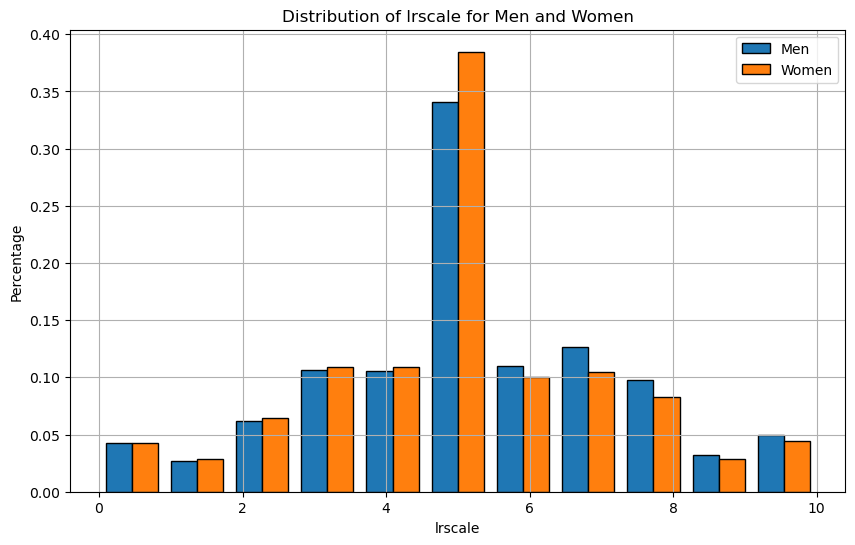

In [87]:
# Filter the DataFrame for men and women
men_data = filtered_df[filtered_df['gndr'] == 1]['lrscale']
women_data = filtered_df[filtered_df['gndr'] == 2]['lrscale']

# Plot histograms for men and women
plt.figure(figsize=(10, 6))
plt.hist([men_data, women_data], bins=11, range=(0, 10), density=True, stacked=False, label=['Men', 'Women'], edgecolor='black')
plt.xlabel('lrscale')
plt.ylabel('Percentage')
plt.title('Distribution of lrscale for Men and Women')
plt.legend()
plt.grid(True)
plt.show()

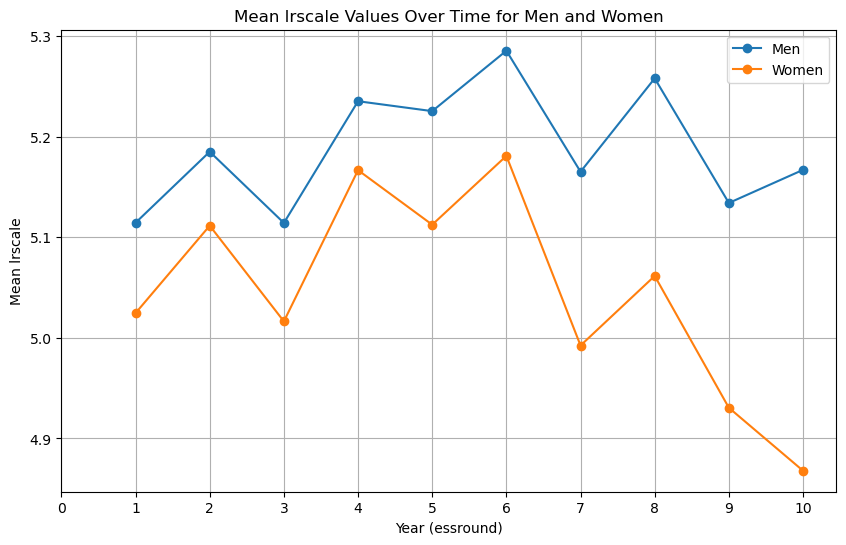

In [107]:
# Filter rows for gender values 1 and 2
filtered_df = df[df['gndr'].isin([1, 2])]

# Filter rows for lrscale values from 0 to 10
filtered_df = filtered_df[(filtered_df['lrscale'] >= 0) & (filtered_df['lrscale'] <= 10)]

# Group by essround and gender, and calculate the mean lrscale
grouped_df = filtered_df.groupby(['essround', 'gndr'])['lrscale'].mean().reset_index()

# Pivot the DataFrame to have gender as columns
pivot_df = grouped_df.pivot(index='essround', columns='gndr', values='lrscale')

# Plot line plot for mean lrscale values for men and women
plt.figure(figsize=(10, 6))
plt.plot(pivot_df.index, pivot_df[1], label='Men', marker='o')
plt.plot(pivot_df.index, pivot_df[2], label='Women', marker='o')
plt.xlabel('Year (essround)')
plt.ylabel('Mean lrscale')
plt.title('Mean lrscale Values Over Time for Men and Women')
plt.xticks(range(11))  # Assuming essround values range from 0 to 10
plt.legend()
plt.grid(True)
plt.show()